Versuch SLE - Bestimmung der spezifischen Ladung eines Elektrons


Erste Aufgabe: Bestimmung der magnetischen Flussdichte:

In [4]:
##David:

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


# B Feld aus Gl 11

# Werte:
d=0.15 #S.20
z1=d/2
z2=-d/2


def B_z(I, z):
    R=0.1475
    N=124
    l=0.025
    mu=sp.constants.mu_0
    B=I*(N*mu)/(2*l)*((z+l/2)/(np.sqrt(R**2+(z+l/2)**2))-(z-l/2)/np.sqrt(R**2+(z-l/2)**2))
    return B


B_ges=B_z(I=5, z=z1)+B_z(I=5, z=z2)
print(B_ges)
#Entspricht den Herstellerangaben

#B Feld aus Hallspannung:
U_hall=(0.2156, 0.2159, 0.2159, 0.2158, 0.2154, 0.2141)
r_hall=(0,      0.01,   0.02,   0.03,   0.04,   0.05)



def B_hall(U_hall):
    eps=(3.125*10**(-3))#Aus S.18 table 4: (typ. sensitivity)| Skalierung wie in der Anleitung beschrieben| V/G
    U_null=2.5 #Volt (Wegen Brückenschaltung irrelevant)
    B_h=(U_hall)/(eps*2) #Gl 21 wird umgestellt.
    return B_h*(10**(-4))#Umrechnung in Tesla

B_h=np.absolute(B_hall(U_hall=U_hall[0]))
print(B_h)
#Funktioniert








0.003741399853782353
0.0034496000000000006


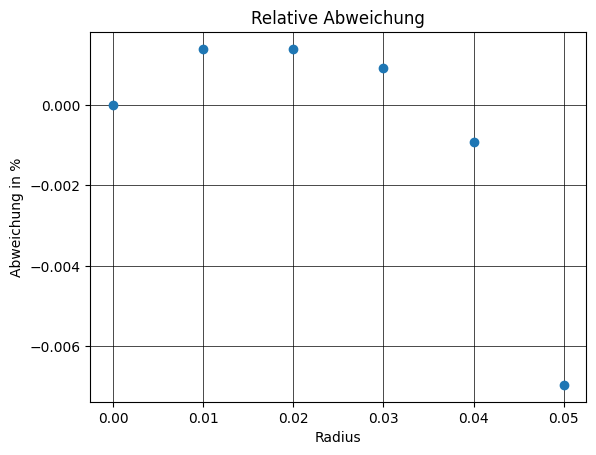

In [5]:
import matplotlib.pyplot as plt

#Berechnung der relativen Abweichung:
#Hallspannung mit r
U_hall=(0.2156, 0.2159, 0.2159, 0.2158, 0.2154, 0.2141)
r_hall=(     0,   0.01,   0.02,   0.03,   0.04,   0.05)

rel_ab=[]


for i in range(len(U_hall)):
    y=(U_hall[i]-U_hall[0])/U_hall[0]
    rel_ab.append(y)

plt.plot(r_hall, rel_ab, linestyle='', marker='o')
plt.grid(visible=True, color='black', linewidth=0.5)
plt.title('Relative Abweichung')
plt.xlabel('Radius')
plt.ylabel('Abweichung in %')
plt.show()







In [7]:
#Berechnung e/m
d=0.08 #Durchmesser in Metern
U_B=295.7 #Beschleunigungsspannung in Volt
B_z=(B_z(I=1.57, z=z1)+B_z(I=1.57, z=z2))*rel_ab[4] #B-Feld im Moment aus Gl. 11



def spez_lad(U_B, B_z, d):
    em=(2*U_B)/((B_z**2)*((d/2)**2))
    return em

em=spez_lad(U_B=U_B, d=d, B_z=B_z)


print(em)



31004054492.368835
